# Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from data_access import load_iris_data
from plots.raw_data import classes_scatter_plot
from plots.learning_results import plot_error_history, plot_2d_decision_boundary
from log_reg import LogisticRegression

### 1. Curves

In [2]:
def odds_ratio(p):
    return p / (1 - p)


def logit(p):
    return np.log(odds_ratio(p))


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

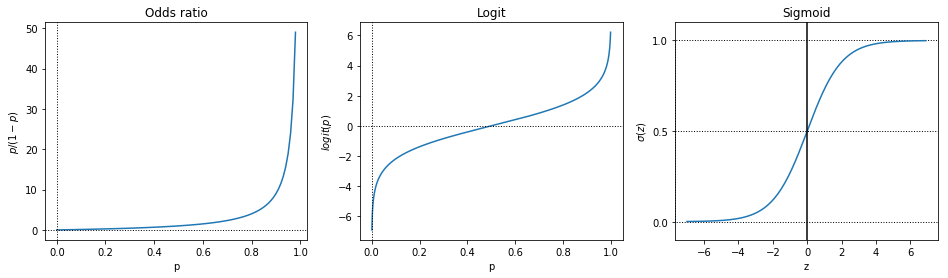

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

p = np.arange(start=0, stop=0.99, step=0.01)

ax1.plot(p, odds_ratio(p))
ax1.axhline(y=0, ls='dotted', linewidth=1, color='k')
ax1.axvline(x=0, ls='dotted', linewidth=1, color='k')
ax1.set_title('Odds ratio')
ax1.set_xlabel('p')
ax1.set_ylabel('$p / (1 - p)$')

p = np.arange(start=0.001, stop=0.999, step=0.001)

ax2.plot(p, logit(p))
ax2.axhline(y=0, ls='dotted', linewidth=1, color='k')
ax2.axvline(x=0, ls='dotted', linewidth=1, color='k')
ax2.set_title('Logit')
ax2.set_xlabel('p')
ax2.set_ylabel('$logit(p)$')

z = np.arange(-7, 7, 0.1)

ax3.plot(z, sigmoid(z))

ax3.set_title('Sigmoid')
ax3.axvline(0.0, color='k')
ax3.axhspan(0.0, 1.0, facecolor='1.0', edgecolor="black", ls='dotted')
ax3.axhline(y=0.5, ls='dotted', linewidth=1, color='k')

ax3.set_yticks([0.0, 0.5, 1.0])
ax3.set_ylim(-0.1, 1.1)
ax3.set_xlabel('z')
ax3.set_ylabel('$\sigma (z)$')

plt.show()

### 2. Dataset overview

In [4]:
df = load_iris_data()

In [5]:
df.shape

(150, 5)

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),int_class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


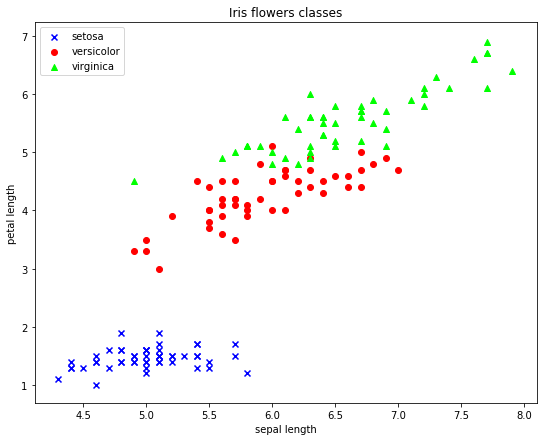

In [7]:
plt.figure(figsize=(9, 7))
classes_scatter_plot(df)

In [8]:
df['int_class'].unique()

array([0, 1, 2], dtype=int64)

In [9]:
predictor_columns = ['sepal length (cm)', 'petal length (cm)']
target_column = 'int_class'

### 3. Linearly separable classes

In [10]:
lin_sep_df = df[df['int_class'].isin([0, 1])].copy()

In [11]:
X = lin_sep_df[predictor_columns].values
y = lin_sep_df[target_column].values.reshape(-1, 1)

In [12]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [14]:
log_reg = LogisticRegression()

In [15]:
log_reg.fit(X_train, y_train)

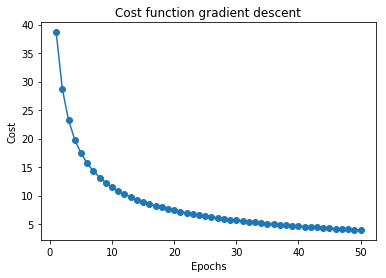

In [16]:
plot_error_history(log_reg.cost_history_, plot_settings={
    'title': 'Cost function gradient descent',
    'xlabel': 'Epochs',
    'ylabel': 'Cost'
})

In [17]:
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

In [18]:
print('training set accuracy:', accuracy_score(y_train, y_train_pred))
print('test set accuracy:', accuracy_score(y_test, y_test_pred))

training set accuracy: 1.0
test set accuracy: 1.0


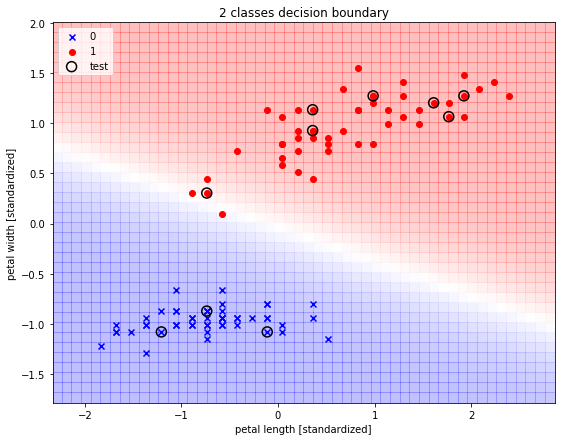

In [19]:
plt.figure(figsize=(9, 7))
plot_2d_decision_boundary(
    X=X_train, y=y_train.ravel(),
    classifier=log_reg,
    X_test=X_test, y_test=y_test.ravel(),
    plot_settings={
        'title': '2 classes decision boundary',
        'xlabel': 'petal length [standardized]',
        'ylabel': 'petal width [standardized]'
    }
)

### 4. Linearly non-separable classes

In [20]:
non_lin_sep_df = df[df['int_class'].isin([1, 2])].copy()

In [21]:
X = non_lin_sep_df[predictor_columns].values
y = non_lin_sep_df[target_column].values.reshape(-1, 1)

In [22]:
y = y - 1

In [23]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [25]:
log_reg = LogisticRegression()

In [26]:
log_reg.fit(X_train, y_train)

In [27]:
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

In [28]:
print('training set accuracy:', accuracy_score(y_train, y_train_pred))
print('test set accuracy:', accuracy_score(y_test, y_test_pred))

training set accuracy: 0.9333333333333333
test set accuracy: 1.0


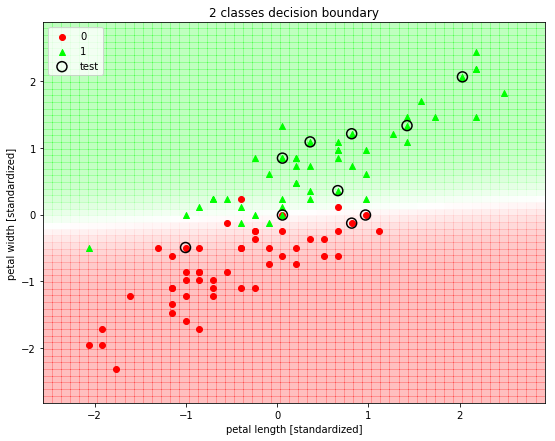

In [29]:
plt.figure(figsize=(9, 7))
plot_2d_decision_boundary(
    X=X_train, y=y_train.ravel(),
    classifier=log_reg,
    X_test=X_test, y_test=y_test.ravel(),
    colors=('red', 'lime'), markers=('o', '^'),
    plot_settings={
        'title': '2 classes decision boundary',
        'xlabel': 'petal length [standardized]',
        'ylabel': 'petal width [standardized]'
    }
)